<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

hA = sigmoid(a * xA + b)

hB = sigmoid(a * xB + b)

y = c * hA * hB + d

In [1]:
from keras import models, layers
import keras.backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

a = 2
b = 1
c = 2
d = 1

def sigmoid(x):
    return 1 / (1+np.exp(-x))

Using TensorFlow backend.


In [2]:
x_train_A = np.random.rand(1000, 1) * 2 - 1
x_train_B = np.random.rand(1000, 1) * 2 - 1

y_train = c * sigmoid(a * x_train_A + b) * sigmoid(a * x_train_B + b) + d

In [4]:
xA = layers.Input((1,), name='xA')
xB = layers.Input((1,), name='xB')

shared_layer = layers.Dense(1, activation='sigmoid', name='shared')

sA = shared_layer(xA)
sB = shared_layer(xB)

mul = layers.Multiply(name='mul1')([sA, sB])
y = layers.Dense(1, name='y')(mul)

model = models.Model([xA, xB], y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
xA (InputLayer)                 (None, 1)            0                                            
__________________________________________________________________________________________________
xB (InputLayer)                 (None, 1)            0                                            
__________________________________________________________________________________________________
shared (Dense)                  (None, 1)            2           xA[0][0]                         
                                                                 xB[0][0]                         
__________________________________________________________________________________________________
mul1 (Multiply)                 (None, 1)            0           shared[0][0]                     
          

In [5]:
model.compile('adam', 'mse')
hist = model.fit([x_train_A, x_train_B], y_train, batch_size=8, epochs=200, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 800 samples, validate on 200 samples
Epoch 1/200
800/800 [==============================] - 0s 304us/step - loss: 3.9873 - val_loss: 3.7974
Epoch 2/200
800/800 [==============================] - 0s 93us/step - loss: 3.5173 - val_loss: 3.3547
Epoch 3/200
800/800 [==============================] - 0s 103us/step - loss: 3.1066 - val_loss: 2.9663
Epoch 4/200
800/800 [==============================] - 0s 113us/step - loss: 2.7442 - val_loss: 2.6215
Epoch 5/200
800/800 [==============================] - 0s 99us/step - loss: 2.4198 - val_loss: 2.3071
Epoch 6/200
800/800 [==============================] - 0s 95us/step - loss: 2.1237 - val_loss: 2.0197
Epoch 7/200
800/800 [==============================] - 0s 95us/step - loss: 1.8485 - val_loss: 1.7501
Epoch 8/200
800/800 [==============================] - 0s 93us/step - loss: 1.5876 - val_loss: 1.4922
Epoch 9/200
800/800 [==============================] - 0s 93us/step - loss: 1.3380 - va

800/800 [==============================] - 0s 110us/step - loss: 6.7889e-04 - val_loss: 5.1935e-04
Epoch 77/200
800/800 [==============================] - 0s 107us/step - loss: 6.4694e-04 - val_loss: 4.9842e-04
Epoch 78/200
800/800 [==============================] - 0s 86us/step - loss: 6.1916e-04 - val_loss: 4.7470e-04
Epoch 79/200
800/800 [==============================] - 0s 87us/step - loss: 5.9354e-04 - val_loss: 4.5233e-04
Epoch 80/200
800/800 [==============================] - 0s 86us/step - loss: 5.6463e-04 - val_loss: 4.3161e-04
Epoch 81/200
800/800 [==============================] - 0s 85us/step - loss: 5.3552e-04 - val_loss: 4.1046e-04
Epoch 82/200
800/800 [==============================] - 0s 104us/step - loss: 5.0792e-04 - val_loss: 3.9728e-04
Epoch 83/200
800/800 [==============================] - 0s 88us/step - loss: 4.8668e-04 - val_loss: 3.7074e-04
Epoch 84/200
800/800 [==============================] - 0s 85us/step - loss: 4.5854e-04 - val_loss: 3.4986e-04
Epoch 85/20

800/800 [==============================] - 0s 104us/step - loss: 3.5231e-10 - val_loss: 2.0283e-10
Epoch 150/200
800/800 [==============================] - 0s 89us/step - loss: 1.8583e-10 - val_loss: 9.6233e-11
Epoch 151/200
800/800 [==============================] - 0s 88us/step - loss: 9.4156e-11 - val_loss: 7.2244e-11
Epoch 152/200
800/800 [==============================] - 0s 85us/step - loss: 4.3039e-11 - val_loss: 1.7663e-11
Epoch 153/200
800/800 [==============================] - 0s 96us/step - loss: 1.7442e-11 - val_loss: 8.3756e-12
Epoch 154/200
800/800 [==============================] - 0s 84us/step - loss: 7.3037e-12 - val_loss: 3.6672e-12
Epoch 155/200
800/800 [==============================] - 0s 87us/step - loss: 3.3068e-12 - val_loss: 1.2012e-12
Epoch 156/200
800/800 [==============================] - 0s 94us/step - loss: 1.1665e-12 - val_loss: 5.0903e-13
Epoch 157/200
800/800 [==============================] - 0s 86us/step - loss: 5.4518e-13 - val_loss: 1.9149e-13
Epoch

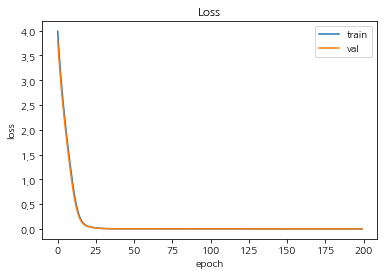

In [6]:
plt.title('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc=0)
plt.show()

In [7]:
shared_weights = model.get_layer('shared').get_weights()
y_weights = model.get_layer('y').get_weights()
print('shared_weights\n', shared_weights, '\n')
print('y_weights\n', y_weights, '\n')

shared_weights
 [array([[1.9999964]], dtype=float32), array([1.000002], dtype=float32)] 

y_weights
 [array([[1.9999992]], dtype=float32), array([0.99999994], dtype=float32)] 

